In [1]:
import os
import cv2
import shutil
import numpy as np
from tqdm import tqdm
from glob import glob
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
# base_dir = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
base_dir = '../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
modality_types = ['flair', 't1ce', 't1', 't2', 'seg']

In [3]:
print ('number of patients:', len (os.listdir (base_dir)) - 2)

number of patients: 369


In [4]:
imgs_path = os.path.join (base_dir, sorted (os.listdir (base_dir))[0])

In [5]:
fnames = glob (f'{imgs_path}/*.nii')
fnames

['../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii',
 '../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii',
 '../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii',
 '../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii',
 '../input/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii']

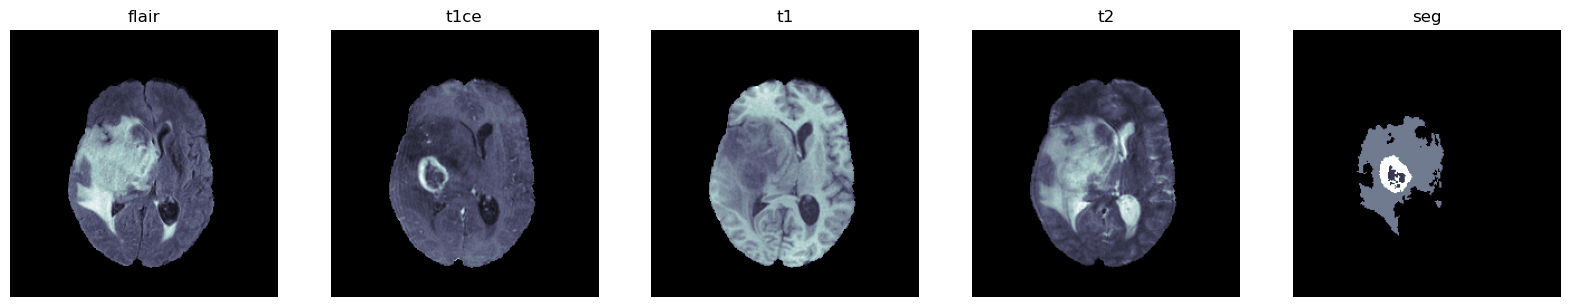

In [6]:
plt.figure (figsize = (20, 5))
for i, modality_type in enumerate (modality_types):
    plt.subplot (1, 5, i + 1)
    img_path = glob (f'{imgs_path}/*_{modality_type}.nii')[0]
    img = nib.load (img_path)
    img = np.asanyarray (img.dataobj).T
    plt.imshow (img [75], cmap = 'bone')
    plt.title (modality_type)
    plt.axis ('off')

**Segmented image description**

In [7]:
img = nib.load (fnames [3])
img = np.asanyarray (img.dataobj).T
print (img.dtype)
print (img.shape)

int16
(155, 240, 240)


In [8]:
# maximum number of segmented image
max_nums = []
for i in tqdm (range (155)):
    max_num = img [i].max ()
    max_nums.append (max_num)

print (max (max_nums))

100%|███████████████████████████████████████| 155/155 [00:00<00:00, 2840.17it/s]

678


In [9]:
# 2 last data are csv files
folders = (sorted (os.listdir (base_dir)))[:-2]
# delet this 355 folder becase the name of seg filet is different from others
folders.pop (354)

'BraTS20_Training_355'

In [10]:
os.mkdir ('BraTs')
i = 0
for folder in tqdm (folders):
    # go to each patient data
    folder_dir = os.path.join (base_dir, folder)
    imgs = []
    for modality_type in modality_types:
        # read each data and save it to list
        img_path = glob (f'{folder_dir}/*_{modality_type}.nii')[0]
        img = nib.load (img_path)
        img = np.asanyarray (img.dataobj).T
        img = ((img - img.min ())/(img.max () - img.min ()) * 255).astype(np.uint8)
        imgs.append (img)
    for j in range (imgs [0].shape [0]):
        # just not empty images
        if sum ([imgs [num][j].sum () for num in range (5)]) != 0:
            i += 1
            # create directory
            if not os.path.exists ('BraTs/' + str (i)):
                os.mkdir ('BraTs/' + str (i))

            for idx, modality_name in enumerate (modality_types):
            
                cv2.imwrite (modality_name + '.jpg', imgs [idx][j])
                
                # save 5 type of each slice in separate folder
                src = modality_name + '.jpg'
                dst = os.path.join ('BraTs/' + str (i), src)
                shutil.move (src, dst)

100%|█████████████████████████████████████████| 368/368 [06:58<00:00,  1.14s/it]
